<a href="https://colab.research.google.com/github/Jonathan9219/Accidentabilidad/blob/main/Proyecto_Accidentabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalar librerías necesarias
!pip install openpyxl

# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO

# Para preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Para modelado
from sklearn.ensemble import RandomForestClassifier
import joblib

# Para evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

print("✅ Entorno configurado correctamente")

✅ Entorno configurado correctamente


In [2]:
# =============================================================================
# BLOQUE 2: CARGA DE DATOS DESDE GITHUB
# =============================================================================

def cargar_datos_desde_github():
    """
    Carga los datos de accidentalidad directamente desde GitHub.

    Returns:
        pandas.DataFrame: Datos de accidentalidad
    """
    try:
        # URL directa al archivo Excel en GitHub
        url = "https://github.com/Jonathan9219/Accidentabilidad/raw/main/DATASETS/Proyecto_Accidentalidad_LIMPIO.xlsx"

        print("🌐 Descargando datos desde GitHub...")

        # Descargar el archivo
        response = requests.get(url)
        response.raise_for_status()

        # Leer el archivo Excel
        data = pd.read_excel(BytesIO(response.content))

        print("✅ Datos cargados exitosamente desde GitHub")
        print(f"📊 Dataset dimensiones: {data.shape[0]} filas × {data.shape[1]} columnas")

        return data

    except Exception as e:
        print(f"❌ Error al cargar datos desde GitHub: {e}")
        return None

# Ejecutar carga de datos
print("🚗 Cargando datos de accidentalidad desde GitHub...")
df_accidentalidad = cargar_datos_desde_github()

if df_accidentalidad is not None:
    print("\n🔍 Primeras 5 filas del dataset:")
    display(df_accidentalidad.head())

    print("\n📋 Información del dataset:")
    print(df_accidentalidad.info())

    print("\n🎯 Distribución de GRAVEDAD_DAÑOS:")
    display(df_accidentalidad['GRAVEDAD_DAÑOS'].value_counts())
else:
    print("❌ No se pudieron cargar los datos. El análisis no puede continuar.")

🚗 Cargando datos de accidentalidad desde GitHub...
🌐 Descargando datos desde GitHub...
✅ Datos cargados exitosamente desde GitHub
📊 Dataset dimensiones: 143706 filas × 14 columnas

🔍 Primeras 5 filas del dataset:


,FECHA,DÍA DE LA SEMANA,HORA,HORA_STR,MES,DIA_SEMANA_NUM,DIA_MES,HORA_NUM,FRANJA_HORARIA,CLASE,DIRECCIÓN,GRAVEDAD_DAÑOS,BARRIO,COMUNA
0,2018-01-07,DOMINGO,20:30:00,20:30,1,6,7,20,NOCHE (18-24),ATROPELLO,CL 79 CR 70,HERIDOS,ALTAMIRA,ROBLEDO
1,2018-01-07,DOMINGO,14:30:00,14:30,1,6,7,14,TARDE (12-18),CHOQUE,CL 73 CR 73 A,HERIDOS,LA PILARICA,ROBLEDO
2,2018-01-07,DOMINGO,14:30:00,14:30,1,6,7,14,TARDE (12-18),CAIDA OCUPANTE,CL 10 CR 25,HERIDOS,LAS LOMAS NO.2,EL POBLADO
3,2018-01-07,DOMINGO,16:30:00,16:30,1,6,7,16,TARDE (12-18),CHOQUE,CL 97 CR 71,HERIDOS,CASTILLA,CASTILLA
4,2018-01-07,DOMINGO,14:20:00,14:20,1,6,7,14,TARDE (12-18),CHOQUE,CR 10 CL 12,HERIDOS,LAS PALMAS,CORREGIMIENTO DE SANTA ELENA



📋 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143706 entries, 0 to 143705
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FECHA             143706 non-null  datetime64[ns]
 1   DÍA DE LA SEMANA  143706 non-null  object        
 2   HORA              143706 non-null  object        
 3   HORA_STR          143706 non-null  object        
 4   MES               143706 non-null  int64         
 5   DIA_SEMANA_NUM    143706 non-null  int64         
 6   DIA_MES           143706 non-null  int64         
 7   HORA_NUM          143706 non-null  int64         
 8   FRANJA_HORARIA    143706 non-null  object        
 9   CLASE             143706 non-null  object        
 10  DIRECCIÓN         143706 non-null  object        
 11  GRAVEDAD_DAÑOS    143706 non-null  object        
 12  BARRIO            143706 non-null  object        
 13  COMUNA            143706 non-nu

,count
GRAVEDAD_DAÑOS,
HERIDOS,78762
DAÑOS,64165
MUERTOS,779



📊 ANÁLISIS EXPLORATORIO RÁPIDO


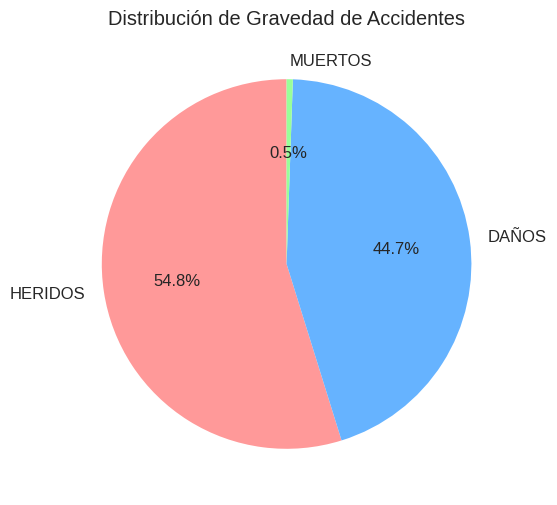

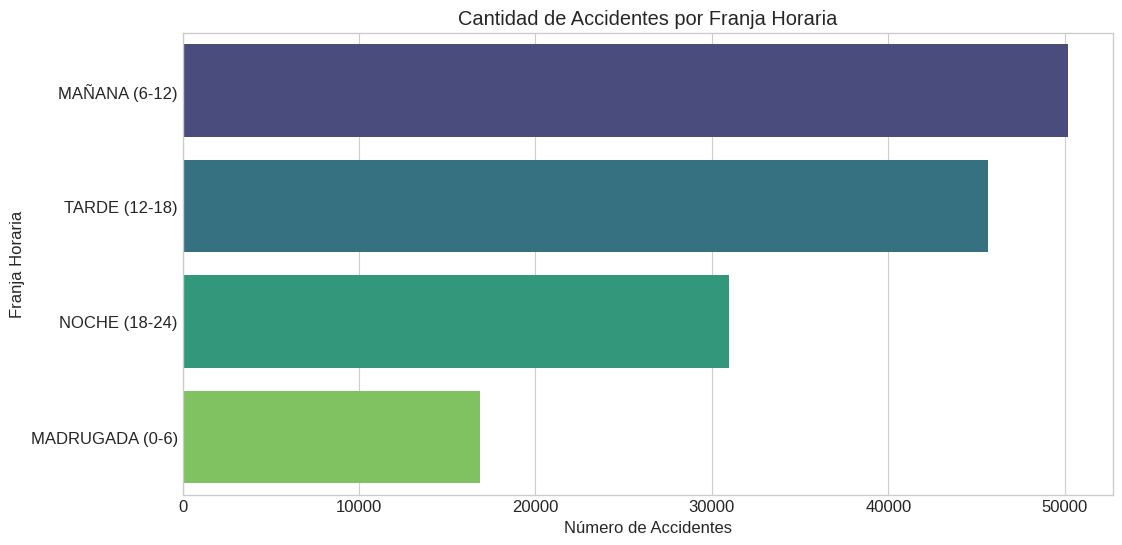

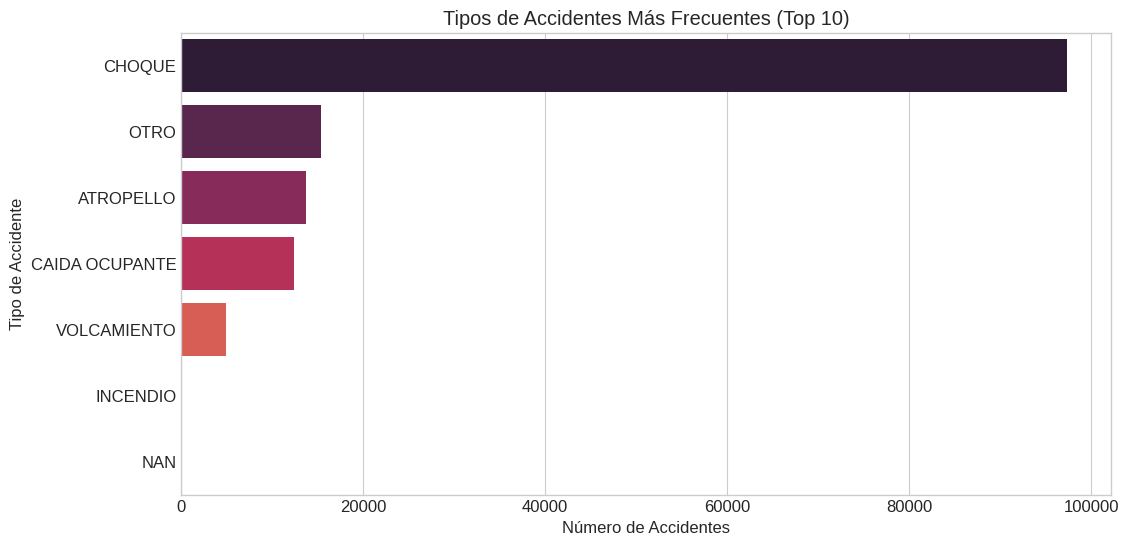

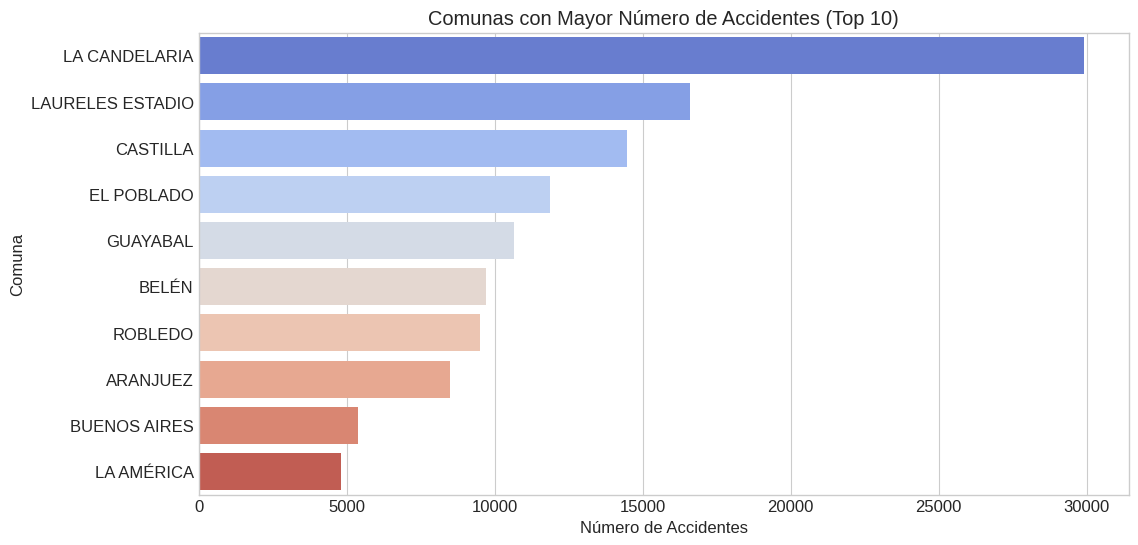

In [3]:
# =============================================================================
# BLOQUE 3: ANÁLISIS EXPLORATORIO RÁPIDO
# =============================================================================

def analisis_rapido(data):
    """
    Realiza un análisis exploratorio rápido de los datos.

    Args:
        data (pandas.DataFrame): Datos de accidentalidad
    """
    print("\n" + "="*50)
    print("📊 ANÁLISIS EXPLORATORIO RÁPIDO")
    print("="*50)

    # 1. Distribución de gravedad
    plt.figure(figsize=(10, 6))
    gravedad_counts = data['GRAVEDAD_DAÑOS'].value_counts()
    colors = ['#ff9999', '#66b3ff', '#99ff99']
    plt.pie(gravedad_counts.values, labels=gravedad_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors)
    plt.title('Distribución de Gravedad de Accidentes')
    plt.show()

    # 2. Accidentes por franja horaria
    plt.figure(figsize=(12, 6))
    franja_counts = data['FRANJA_HORARIA'].value_counts()
    sns.barplot(x=franja_counts.values, y=franja_counts.index, palette='viridis')
    plt.title('Cantidad de Accidentes por Franja Horaria')
    plt.xlabel('Número de Accidentes')
    plt.ylabel('Franja Horaria')
    plt.show()

    # 3. Top 10 tipos de accidente
    plt.figure(figsize=(12, 6))
    clase_counts = data['CLASE'].value_counts().head(10)
    sns.barplot(x=clase_counts.values, y=clase_counts.index, palette='rocket')
    plt.title('Tipos de Accidentes Más Frecuentes (Top 10)')
    plt.xlabel('Número de Accidentes')
    plt.ylabel('Tipo de Accidente')
    plt.show()

    # 4. Top 10 comunas con más accidentes
    plt.figure(figsize=(12, 6))
    comuna_counts = data['COMUNA'].value_counts().head(10)
    sns.barplot(x=comuna_counts.values, y=comuna_counts.index, palette='coolwarm')
    plt.title('Comunas con Mayor Número de Accidentes (Top 10)')
    plt.xlabel('Número de Accidentes')
    plt.ylabel('Comuna')
    plt.show()

# Ejecutar análisis rápido
if df_accidentalidad is not None:
    analisis_rapido(df_accidentalidad)

In [4]:
# =============================================================================
# BLOQUE 4: PREPARACIÓN DE DATOS
# =============================================================================

def preparar_datos(data):
    """
    Prepara los datos para modelado con Random Forest.

    Args:
        data (pandas.DataFrame): Datos de accidentalidad

    Returns:
        tuple: X_train, X_test, y_train, y_test, preprocessor
    """
    print("\n" + "="*50)
    print("🔧 PREPARANDO DATOS PARA RANDOM FOREST")
    print("="*50)

    # Crear copia para no modificar el original
    df_model = data.copy()

    # 1. Definir variable objetivo (binaria: HERIDOS/MUERTOS vs DAÑOS)
    df_model['TARGET_HERIDOS'] = (df_model['GRAVEDAD_DAÑOS'].isin(['HERIDOS', 'MUERTOS'])).astype(int)

    print("🎯 Variable objetivo creada:")
    print(f"   - 0 (Solo daños): {(df_model['TARGET_HERIDOS'] == 0).sum()} accidentes")
    print(f"   - 1 (Con heridos/muertos): {(df_model['TARGET_HERIDOS'] == 1).sum()} accidentes")
    print(f"   - Proporción de heridos: {df_model['TARGET_HERIDOS'].mean():.2%}")

    # 2. Seleccionar características (usando las columnas disponibles)
    features = ['MES', 'DIA_SEMANA_NUM', 'HORA_NUM', 'CLASE', 'COMUNA']
    X = df_model[features]
    y = df_model['TARGET_HERIDOS']

    print(f"\n📋 Características seleccionadas: {features}")

    # 3. Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    print(f"📚 Conjunto de entrenamiento: {X_train.shape[0]} muestras")
    print(f"🧪 Conjunto de prueba: {X_test.shape[0]} muestras")

    # 4. Configurar preprocesamiento (sin imputers ya que no hay nulos)
    numeric_features = ['MES', 'DIA_SEMANA_NUM', 'HORA_NUM']
    categorical_features = ['CLASE', 'COMUNA']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
        ])

    # 5. Probar preprocesamiento
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    print(f"✅ Forma después del preprocesamiento: {X_train_preprocessed.shape}")

    return X_train, X_test, y_train, y_test, preprocessor

# Ejecutar preparación de datos
if df_accidentalidad is not None:
    X_train, X_test, y_train, y_test, preprocessor = preparar_datos(df_accidentalidad)


🔧 PREPARANDO DATOS PARA RANDOM FOREST
🎯 Variable objetivo creada:
   - 0 (Solo daños): 64165 accidentes
   - 1 (Con heridos/muertos): 79541 accidentes
   - Proporción de heridos: 55.35%

📋 Características seleccionadas: ['MES', 'DIA_SEMANA_NUM', 'HORA_NUM', 'CLASE', 'COMUNA']
📚 Conjunto de entrenamiento: 114964 muestras
🧪 Conjunto de prueba: 28742 muestras
✅ Forma después del preprocesamiento: (114964, 34)



🤖 ENTRENAMIENTO CON RANDOM FOREST
🚀 Entrenando Random Forest con n_estimators=5...

📊 RESULTADOS DEL MODELO:
┌──────────────────┬────────────┐
│     Métrica      │  Valor     │
├──────────────────┼────────────┤
│ Exactitud        │   0.7625   │
│ Precisión        │   0.9661   │
│ Sensibilidad     │   0.5917   │
│ F1-Score         │   0.7339   │
│ AUC-ROC          │   0.8227   │
└──────────────────┴────────────┘


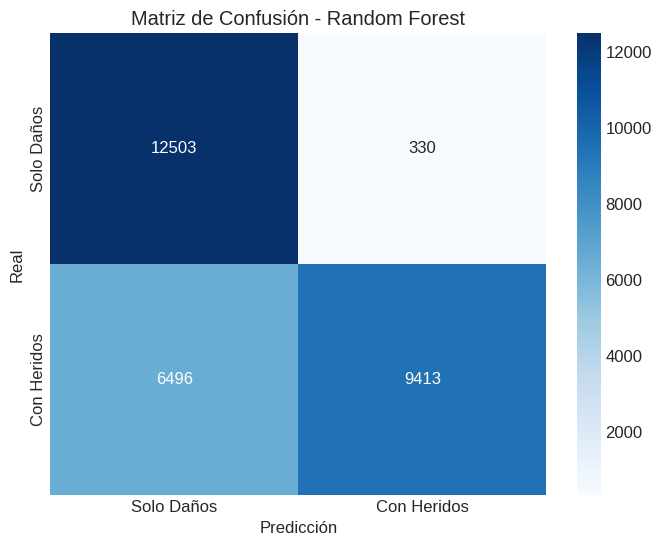

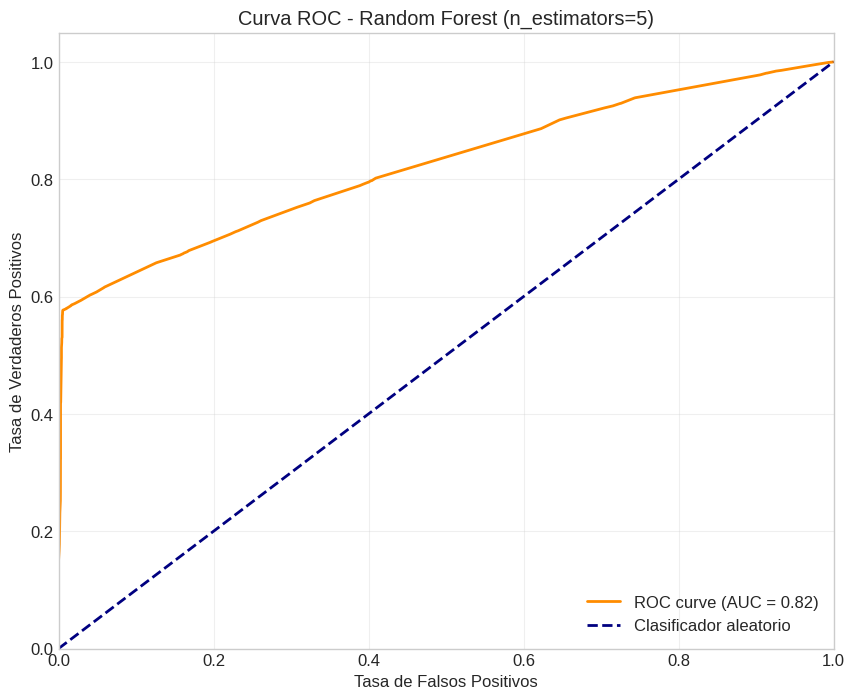


📄 INFORME DE CLASIFICACIÓN:
              precision    recall  f1-score   support

  Solo Daños       0.66      0.97      0.79     12833
 Con Heridos       0.97      0.59      0.73     15909

    accuracy                           0.76     28742
   macro avg       0.81      0.78      0.76     28742
weighted avg       0.83      0.76      0.76     28742



In [5]:
# =============================================================================
# BLOQUE 5: ENTRENAMIENTO CON RANDOM FOREST
# =============================================================================

def entrenar_random_forest(X_train, X_test, y_train, y_test, preprocessor):
    """
    Entrena y evalúa un modelo de Random Forest con n_estimators=5.

    Args:
        X_train, X_test, y_train, y_test: Conjuntos de datos
        preprocessor: Transformador de preprocesamiento

    Returns:
        tuple: Modelo entrenado, resultados
    """
    print("\n" + "="*50)
    print("🤖 ENTRENAMIENTO CON RANDOM FOREST")
    print("="*50)

    # 1. Crear pipeline con Random Forest
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(
            n_estimators=5,      # Solo 5 árboles como solicitado
            random_state=42,
            max_depth=5          # Limitamos profundidad para evitar overfitting
        ))
    ])

    print("🚀 Entrenando Random Forest con n_estimators=5...")

    # 2. Entrenar modelo
    model.fit(X_train, y_train)

    # 3. Hacer predicciones
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # 4. Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print("\n📊 RESULTADOS DEL MODELO:")
    print("┌──────────────────┬────────────┐")
    print("│     Métrica      │  Valor     │")
    print("├──────────────────┼────────────┤")
    print(f"│ Exactitud        │   {accuracy:.4f}   │")
    print(f"│ Precisión        │   {precision:.4f}   │")
    print(f"│ Sensibilidad     │   {recall:.4f}   │")
    print(f"│ F1-Score         │   {f1:.4f}   │")
    print(f"│ AUC-ROC          │   {roc_auc:.4f}   │")
    print("└──────────────────┴────────────┘")

    # 5. Matriz de confusión
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Solo Daños', 'Con Heridos'],
                yticklabels=['Solo Daños', 'Con Heridos'])
    plt.title('Matriz de Confusión - Random Forest')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

    # 6. Curva ROC
    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador aleatorio')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - Random Forest (n_estimators=5)')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

    # 7. Reporte de clasificación
    print("\n📄 INFORME DE CLASIFICACIÓN:")
    print(classification_report(y_test, y_pred, target_names=['Solo Daños', 'Con Heridos']))

    resultados = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

    return model, resultados

# Ejecutar entrenamiento
if 'X_train' in locals():
    modelo_rf, resultados_rf = entrenar_random_forest(
        X_train, X_test, y_train, y_test, preprocessor
    )

In [6]:
# =============================================================================
# BLOQUE 6: PREDICCIONES Y GUARDADO
# =============================================================================

def hacer_predicciones(modelo):
    """
    Realiza predicciones con nuevos datos de ejemplo.

    Args:
        modelo: Modelo entrenado de Random Forest
    """
    print("\n" + "="*50)
    print("🔮 PREDICCIONES CON NUEVOS DATOS")
    print("="*50)

    # Crear datos de ejemplo para predicción
    nuevos_accidentes = pd.DataFrame({
        'MES': [1, 7, 12, 3],  # Enero, Julio, Diciembre, Marzo
        'DIA_SEMANA_NUM': [6, 2, 4, 1],  # Domingo, Martes, Jueves, Lunes
        'HORA_NUM': [20, 14, 8, 18],  # Noche, Tarde, Mañana, Noche
        'CLASE': ['CHOQUE', 'ATROPELLO', 'CHOQUE', 'VOLCAMIENTO'],
        'COMUNA': ['LAURELES ESTADIO', 'LA CANDELARIA', 'CASTILLA', 'ROBLEDO']
    })

    print("📋 Nuevos accidentes a predecir:")
    display(nuevos_accidentes)

    # Hacer predicciones
    try:
        predicciones = modelo.predict(nuevos_accidentes)
        probabilidades = modelo.predict_proba(nuevos_accidentes)[:, 1]

        # Crear DataFrame con resultados
        resultados = nuevos_accidentes.copy()
        resultados['PREDICCION'] = ['CON HERIDOS' if p == 1 else 'SOLO DAÑOS' for p in predicciones]
        resultados['PROBABILIDAD_HERIDOS'] = [f"{prob:.1%}" for prob in probabilidades]
        resultados['RIESGO'] = ['ALTO' if prob > 0.7 else 'MEDIO' if prob > 0.5 else 'BAJO'
                               for prob in probabilidades]

        print("\n🎯 RESULTADOS DE PREDICCIÓN:")
        display(resultados)

        return resultados

    except Exception as e:
        print(f"❌ Error en las predicciones: {e}")
        return None

def guardar_modelo(modelo, filename='modelo_random_forest.joblib'):
    """
    Guarda el modelo entrenado.

    Args:
        modelo: Modelo entrenado
        filename: Nombre del archivo
    """
    try:
        joblib.dump(modelo, filename)
        print(f"✅ Modelo guardado exitosamente como: '{filename}'")
        return True
    except Exception as e:
        print(f"❌ Error al guardar el modelo: {e}")
        return False

# Ejecutar predicciones y guardado
if 'modelo_rf' in locals():
    # Hacer predicciones
    resultados_prediccion = hacer_predicciones(modelo_rf)

    # Guardar modelo
    guardar_modelo(modelo_rf)


🔮 PREDICCIONES CON NUEVOS DATOS
📋 Nuevos accidentes a predecir:


,MES,DIA_SEMANA_NUM,HORA_NUM,CLASE,COMUNA
0,1,6,20,CHOQUE,LAURELES ESTADIO
1,7,2,14,ATROPELLO,LA CANDELARIA
2,12,4,8,CHOQUE,CASTILLA
3,3,1,18,VOLCAMIENTO,ROBLEDO



🎯 RESULTADOS DE PREDICCIÓN:


,MES,DIA_SEMANA_NUM,HORA_NUM,CLASE,COMUNA,PREDICCION,PROBABILIDAD_HERIDOS,RIESGO
0,1,6,20,CHOQUE,LAURELES ESTADIO,SOLO DAÑOS,43.6%,BAJO
1,7,2,14,ATROPELLO,LA CANDELARIA,CON HERIDOS,89.1%,ALTO
2,12,4,8,CHOQUE,CASTILLA,SOLO DAÑOS,47.3%,BAJO
3,3,1,18,VOLCAMIENTO,ROBLEDO,CON HERIDOS,90.0%,ALTO


✅ Modelo guardado exitosamente como: 'modelo_random_forest.joblib'


In [7]:
# =============================================================================
# BLOQUE 7: ANÁLISIS DE IMPORTANCIA DE VARIABLES
# =============================================================================

def analizar_importancia_variables(modelo, preprocessor):
    """
    Analiza la importancia de las variables en el modelo Random Forest.

    Args:
        modelo: Modelo entrenado
        preprocessor: Transformador de preprocesamiento
    """
    print("\n" + "="*50)
    print("🔍 ANÁLISIS DE IMPORTANCIA DE VARIABLES")
    print("="*50)

    # Extraer el modelo Random Forest del pipeline
    rf_model = modelo.named_steps['classifier']

    # Obtener nombres de características después del preprocesamiento
    numeric_features = ['MES', 'DIA_SEMANA_NUM', 'HORA_NUM']
    categorical_features = ['CLASE', 'COMUNA']

    # Obtener nombres de características categóricas después de one-hot encoding
    ohe = modelo.named_steps['preprocessor'].named_transformers_['cat']
    cat_feature_names = ohe.get_feature_names_out(categorical_features)

    # Combinar nombres de características
    feature_names = numeric_features + list(cat_feature_names)

    # Obtener importancias
    importancias = rf_model.feature_importances_

    # Crear DataFrame
    importancia_df = pd.DataFrame({
        'Variable': feature_names,
        'Importancia': importancias
    }).sort_values('Importancia', ascending=False)

    print("📊 Variables más importantes para predecir accidentes con heridos:")
    display(importancia_df.head(10))

    # Visualizar top 10 variables más importantes
    plt.figure(figsize=(12, 8))
    top_10 = importancia_df.head(10)
    sns.barplot(x='Importancia', y='Variable', data=top_10, palette='viridis')
    plt.title('Top 10 Variables Más Importantes - Random Forest')
    plt.xlabel('Importancia')
    plt.ylabel('Variable')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    return importancia_df

# Ejecutar análisis de importancia
if all(var in locals() for var in ['modelo_rf', 'preprocessor']):
    importancia_variables = analizar_importancia_variables(modelo_rf, preprocessor)

In [8]:
# =============================================================================
# BLOQUE 8: RESUMEN EJECUTIVO
# =============================================================================

def generar_resumen_final(df_accidentalidad, resultados):
    """
    Genera un resumen ejecutivo del análisis.

    Args:
        df_accidentalidad: DataFrame con los datos
        resultados: Resultados del modelo
    """
    print("\n" + "="*60)
    print("📊 RESUMEN EJECUTIVO DEL PROYECTO")
    print("="*60)

    # Estadísticas generales
    total_accidentes = len(df_accidentalidad)
    accidentes_con_heridos = len(df_accidentalidad[df_accidentalidad['GRAVEDAD_DAÑOS'].isin(['HERIDOS', 'MUERTOS'])])
    tasa_heridos = accidentes_con_heridos / total_accidentes

    print("📈 ESTADÍSTICAS GENERALES:")
    print(f"   • Total de accidentes analizados: {total_accidentes:,}")
    print(f"   • Accidentes con heridos/muertos: {accidentes_con_heridos:,}")
    print(f"   • Tasa de accidentes con heridos: {tasa_heridos:.2%}")

    print(f"\n🤖 MODELO RANDOM FOREST:")
    print(f"   • n_estimators: 5")
    print(f"   • Exactitud: {resultados['accuracy']:.2%}")
    print(f"   • Precisión: {resultados['precision']:.2%}")
    print(f"   • Sensibilidad: {resultados['recall']:.2%}")
    print(f"   • F1-Score: {resultados['f1']:.4f}")
    print(f"   • AUC-ROC: {resultados['roc_auc']:.4f}")

    # Hallazgos principales
    print(f"\n🔍 HALLAZGOS PRINCIPALES:")

    # Franja horaria más peligrosa
    franja_peligrosa = df_accidentalidad.groupby('FRANJA_HORARIA')['GRAVEDAD_DAÑOS']\
        .apply(lambda x: (x.isin(['HERIDOS', 'MUERTOS']).mean()))\
        .idxmax()

    print(f"   • Franja horaria más peligrosa: {franja_peligrosa}")

    # Tipo de accidente más peligroso
    tipo_peligroso = df_accidentalidad.groupby('CLASE')['GRAVEDAD_DAÑOS']\
        .apply(lambda x: (x.isin(['HERIDOS', 'MUERTOS']).mean()))\
        .idxmax()

    print(f"   • Tipo de accidente más peligroso: {tipo_peligroso}")

    # Comuna con más accidentes con heridos
    comuna_peligrosa = df_accidentalidad.groupby('COMUNA')['GRAVEDAD_DAÑOS']\
        .apply(lambda x: (x.isin(['HERIDOS', 'MUERTOS']).mean()))\
        .idxmax()

    print(f"   • Comuna con mayor tasa de heridos: {comuna_peligrosa}")

    print(f"\n💡 RECOMENDACIONES:")
    print(f"   1. Reforzar vigilancia en: {franja_peligrosa}")
    print(f"   2. Campañas preventivas para: {tipo_peligroso}")
    print(f"   3. Focalizar recursos en: {comuna_peligrosa}")
    print(f"   4. Utilizar el modelo para predicción de riesgo")

# Generar resumen final
if all(var in locals() for var in ['df_accidentalidad', 'resultados_rf']):
    generar_resumen_final(df_accidentalidad, resultados_rf)

print("\n" + "="*60)
print("✅ PROYECTO COMPLETADO EXITOSAMENTE")
print("="*60)


✅ PROYECTO COMPLETADO EXITOSAMENTE
